In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'/Users/joao.goncalves/Documents/Repos/aima-python')
from search import *
from helpers import maze_generator, plot_tile_map
from enums import MazePositionType
from RobotProblem import RobotProblem
from copy import copy, deepcopy
import random
import numpy as np
import time

def plot_path(maze, path, problem):
    m = maze.copy()
    for s in problem.exp:
        if m[s[0], s[1]] != MazePositionType.ROBOT and m[s[0], s[1]] != MazePositionType.GOAL:
            m[s[0], s[1]] = MazePositionType.VISITED
            
    for d in path.path():
        s = d.state        
        if m[s[0], s[1]] != MazePositionType.ROBOT and m[s[0], s[1]] != MazePositionType.GOAL:
            m[s[0], s[1]] = MazePositionType.PATH
    plot_tile_map(m)

random.seed(10)
maze = maze_generator()


# Comparando algorítmos de busca informada e não informada

João Vitor Araki Gonçalves (176353)

## Introdução

O objetivo desse trabalho é comparar a performance de diferentes algorítmos de busca no problema de um robô tentando se navegar num lambirinto.

O desenvolvimento do trabalho foi baseado nas implementações de algorítmos de busca do pacote [aima-python](https://github.com/aimacode/aima-python/blob/master/search.ipynb), foram utilizadas as abordagens **breadth first search**, **depth first search** e **a-star** com as heurísticas de distância manhattan e distância euclidiana.

Todos esses algorítmos forma comparados num labirinto de 60 por 60 gerado randomicamente com paredes intransponíveis, todos foram testados no mesmo labirinto para garantir comparabilidade.


O objetivo desse trabalho é comparar como diferentes algorítmos de busca se comportam em certos cenários e como eles se comparam entre si. Para isso foi medido o número de estados visitados por cada um, a otimicidade da solução final e o tempo levado na execução do mesmo.

## O estado e ações

Inicialmente o estado foi modelado como (x, y, angle), onde **x e y** é o ponto onde o robô está representado no labirinto, e o *angle* é a direção em que o robô está virado, porém isso causou alguns problemas devido a forma que o **aima** guarda estados passados, eles são todos guardados em um **set** e comparados por inteiro, então é possível que o robô retorne para um mesmo ponto no mapa, desde que esteja virado para outra direção. Isso tornou os resultados confusos e difíceis de se comparar, principalmente no caso do dfs, então foi decidido simplificar a representação do problema.

O estado é estruturado como (x, y) onde **x e y** compõe o ponto onde o robô se encontra no mapa, e ele possui ações de **GO_FOWARD**, **GO_LEFT**, **GO_RIGHT**, **GO_UP** e **GO_DOWN**. Portanto o estado da direção que ele está virado foi removida.
Esse mapeamento simplificado do estado considera que o robô não tem custo para ir em outra direção, ou seja, que ele consegue ir para os quatro sentidos sem precisar se virar, como [esse exemplo](https://www.youtube.com/watch?v=HBdZzmTGeaI)

Essa abordagem é equivalente à se ter o parâmetro de angulo, mas com ele ser limitado aos valores 0, 90, 180 e 270

## Os algorítmos
Nessa seção vamos fazer uma análise dos diferentes algorítmos utilizados.

### BFS (Busca em largura)
O BFS utilizado foi o de busca em grafo, que valida nós já vizitados. 
Ele é completo, ou seja, sempre vai encontrar a solução se existente, e é otímo, ou seja, sempre vai encontrar um caminho de menor custo possível.
Tem complexidade de tempo: $$O(b^{d+1})$$
onde b é a largura do grafo formado e d a profundidade do mesmo
Em relação à complexidade de memória, todos os nós visitados são guardados em memória, portanto é $$O(b^{d+1})$$

### DFS (Busca em profundidade)
O DFS utilizado foi o de busca em grafo, que valida nós já vizitados. 
Como é guardados os nós já visitaods ele é completo, ou seja, sempre vai encontrar a solução se existente, porém não é ótimo, ou seja, sempre vai alguma solução, mas não necessáriamente a melhor solução, será fácil avaliar isso nos resultados.
Tem complexidade de tempo igual ao BFS: $$O(b^{m})$$
onde b é a largura do grafo formado e m a profundidade do mesmo
Em relação à complexidade de memória, é somente necessário guardar os nós do caminho sendo avaliado atualmente, portanto é $$O(b^{bm})$$

### A* (A star)
O A* foi o algorítmo de busca informado utilizado. Em relação ao A*, ele é completo e ótimo caso a heurística utilizada seja admissível, ou seja $$h(c) <= custo \space real$$
As heurísticas utilizadas foram a distância manhattan e a distância euclidiana, onde a primeira da a distância ótima para quando só se pode mover-se em 4 direções, como é o caso do nosso problema, e a segunda dá a distância em linha reta até a solução. Em ambos os casos, essa distância é maior que a real, já que temos paredes no meio do caminho, portanto o A* nesse caso é ótimo e completo.
A complexidade do A* é igual ao **BFS** no pior caso, já que ele funciona da mesma forma quando a heurística é um valor alto constante.
portanto:
Tem complexidade de tempo: $$O(b^{m})$$
onde b é a largura do grafo formado e m a profundidade do mesmo
Em relação à complexidade de memória, todos os nós visitados são guardados em memória, portanto é $$O(b^{m})$$

## Resultados

### Gráfico 1 (BFS)

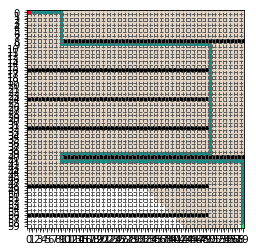

bfs solution cost: 201
number of explored nodes 2870
execution time 0.09432601928710938


In [2]:

problem_breadth = RobotProblem(maze)
start = time.time()
breadth = breadth_first_graph_search(problem_breadth)
end = time.time()
solution_cost = len(breadth.path())
explored = len(problem_breadth.exp)
plot_path(maze, breadth, problem_breadth)

print("bfs solution cost:", solution_cost)
print("number of explored nodes", explored)
print("execution time", end - start)



### Gráfico 2 (DFS)

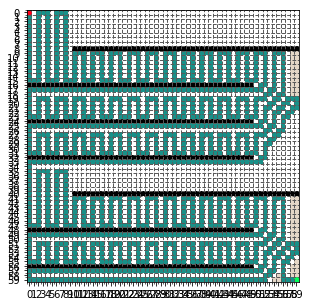

dfs solution cost: 1431
number of explored nodes 1480
execution time 0.44681310653686523


In [3]:

problem_dfs = RobotProblem(maze)
start = time.time()
depth_path = depth_first_graph_search(problem_dfs)
end = time.time()
solution_cost = len(depth_path.path())
explored = len(problem_dfs.exp)
plot_path(maze, depth_path, problem_dfs)

print("dfs solution cost:", solution_cost)
print("number of explored nodes", explored)
print("execution time", end - start)


### Gráfico 3 (A* eucídiana)

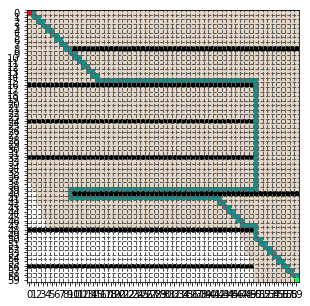

A* euclidian solution cost: 201
number of explored nodes 2738
execution time 0.20085406303405762


In [4]:
problem_star_sqrt = RobotProblem(maze)
start = time.time()
a_star_sqr_path = astar_search(problem_star_sqrt, h=memoize(problem_star_sqrt.squared_manhattan_distance, "squared_manhattan_distance"))
end = time.time()
solution_cost = len(a_star_sqr_path.path())
explored = len(problem_star_sqrt.exp)
plot_path(maze, a_star_sqr_path, problem_star_sqrt)

print("A* euclidian solution cost:", solution_cost)
print("number of explored nodes", explored)
print("execution time", end - start)

### Gráfico 4 (A* Manhattan)

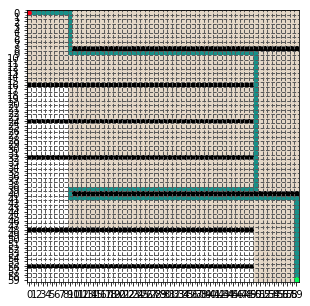

A* manhattan solution cost: 201
number of explored nodes 2488
execution time 0.23924779891967773


In [5]:
problem_star_d = RobotProblem(maze)
start = time.time()
a_star_distance_path = astar_search(problem_star_d, h=memoize(problem_star_d.manhattan_distance, "manhattan_distance"))
end = time.time()
solution_cost = len(a_star_distance_path.path())
explored = len(problem_star_d.exp)
plot_path(maze, a_star_distance_path, problem_star_d)

print("A* manhattan solution cost:", solution_cost)
print("number of explored nodes", explored)
print("execution time", end - start)

### Gráfico 5 (A* euclídiana mesma linha)

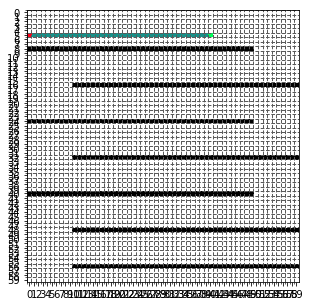

A* euclidian solution cost: 41
number of explored nodes 40
execution time 0.0033719539642333984


In [6]:
same_line_maze = maze_generator((5,0), (5, 40))
problem_star_sqrt = RobotProblem(same_line_maze)
start = time.time()
a_star_sqr_path = astar_search(problem_star_sqrt, h=memoize(problem_star_sqrt.squared_manhattan_distance, "squared_manhattan_distance"))
end = time.time()
solution_cost = len(a_star_sqr_path.path())
explored = len(problem_star_sqrt.exp)
plot_path(same_line_maze, a_star_sqr_path, problem_star_sqrt)

print("A* euclidian solution cost:", solution_cost)
print("number of explored nodes", explored)
print("execution time", end - start)

### Gráfico 6 (A* Manhattan mesma linha)

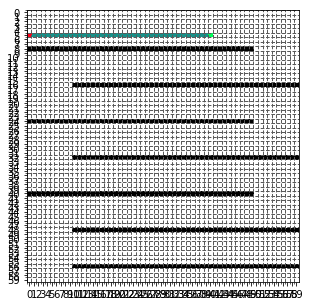

A* manhattan solution cost: 41
number of explored nodes 40
execution time 0.00334930419921875


In [7]:
problem_star_d = RobotProblem(same_line_maze)
start = time.time()
a_star_distance_path = astar_search(problem_star_d, h=memoize(problem_star_d.manhattan_distance, "manhattan_distance"))
end = time.time()
solution_cost = len(a_star_distance_path.path())
explored = len(problem_star_d.exp)
plot_path(same_line_maze, a_star_distance_path, problem_star_d)

print("A* manhattan solution cost:", solution_cost)
print("number of explored nodes", explored)
print("execution time", end - start)

### Gráfico 7 (BFS Mesma linha)

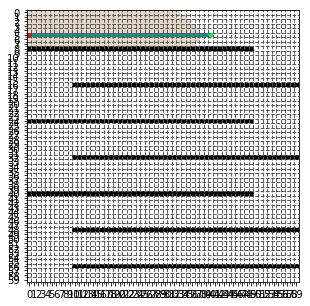

bfs solution cost: 41
number of explored nodes 295
execution time 0.007394075393676758


In [8]:
problem_breadth = RobotProblem(same_line_maze)
start = time.time()
breadth = breadth_first_graph_search(problem_breadth)
end = time.time()
solution_cost = len(breadth.path())
explored = len(problem_breadth.exp)
plot_path(same_line_maze, breadth, problem_breadth)

print("bfs solution cost:", solution_cost)
print("number of explored nodes", explored)
print("execution time", end - start)

#### Gráfico 8 (A* euclídiana diagonal)

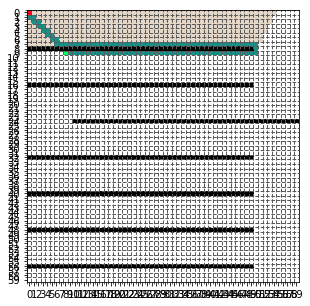

A* euclidian solution cost: 102
number of explored nodes 467
execution time 0.01968979835510254


In [9]:
diagonal_maze = maze_generator((0,0), (9, 8))
problem_star_sqrt = RobotProblem(diagonal_maze)
start = time.time()
a_star_sqr_path = astar_search(problem_star_sqrt, h=memoize(problem_star_sqrt.squared_manhattan_distance, "squared_manhattan_distance"))
end = time.time()
solution_cost = len(a_star_sqr_path.path())
explored = len(problem_star_sqrt.exp)
plot_path(diagonal_maze, a_star_sqr_path, problem_star_sqrt)

print("A* euclidian solution cost:", solution_cost)
print("number of explored nodes", explored)
print("execution time", end - start)

### Gráfico 9 (A* manhattan diagonal)

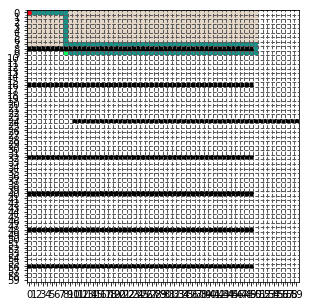

A* manhattan solution cost: 102
number of explored nodes 451
execution time 0.01905512809753418


In [10]:
problem_star_d = RobotProblem(diagonal_maze)
start = time.time()
a_star_distance_path = astar_search(problem_star_d, h=memoize(problem_star_d.manhattan_distance, "manhattan_distance"))
end = time.time()
solution_cost = len(a_star_distance_path.path())
explored = len(problem_star_d.exp)
plot_path(diagonal_maze, a_star_distance_path, problem_star_d)

print("A* manhattan solution cost:", solution_cost)
print("number of explored nodes", explored)
print("execution time", end - start)

## Discussão

Inicialmente comparando os gráficos 1 e 2 dos algorítmos **BFS** e **DFS** fica clara as vantagens e desvantagens clássicas de ambos. No caso do **BFS** conseguimos encontrar a solução ótima do labirinto de 201, já no **DFS** encontramos uma solução mais próxima da pior possível, isso se dá devido ao fato do **DFS** priorizar uma ordem específica de ações (a determinada no código). Mas como esperado ambos os algorítmos encontraram uma solução para o problema proposto. Já em relação ao consumo de memória e nós percorridos, a vantagem do **DFS** é clara, vizitando apróximadamente um terço dos nós vizitados pelo **BFS**, e poucos dos nós vizitados não fazem parte da solução no **DFS** em comparação ao **DFS** que vizitou praticamente todos os nós do labirinto.
Em relação ao tempo de execuçõa, a vantagem foi do **BFS**, que durou um terço do tempo de execução do **DFS**, isso pode-se dar ao fato de que a solução encontrada do **DFS** é muito pior, que causa a expanção de uma árvore maior.

Em relação aos gráficos 3 e 4, as buscas informadas performaram de forma similar ao **BFS**, ambos encontrando uma solução ótima de mesmo custo como esperado, mas vizitando ligeiramente menos nós, que também era esperado, já que o objetivo da heurística é guiar a abertura dos nós para o resultado ótimo. 
O tempo de execução das buscas informadas foi mais comparável com o **DFS** que foi inesperado, já que em pior caso era esperado que fosse similar ao **BFS**, isso pode dar-se como uma falha de otimização no código, pois as heurísticas foram passadas como parâmetro para os algorítmos, isso pode causar um overhead na execução dessas funções.

A vantagem de algorítmos de busca informados pode ser observada nos gráficos 5, 6 e 7, onde ambas as heurísticas conseguiram resolver o problema sem explorar nenhum nó fora da solução, que era esperado, já que o caminho que minimiza ambas as heurísticas guia o robô diretamente para a solução. Em contraste o mesmo caso utilizando **BFS** consultou apróximadamente 6 vezes mais estados e utilizou o dobro do tempo de execução para alcançar o mesmo resultado.

Já nos gráficos 8 e 9, é possível observar uma vantagem para a heurística manhattan, que consultou menos nós e levou metade do tempo de execução. Esse tipo de vantagem é esperada para a forma que o modelo foi constiuído, com movimentos em apenas 4 direções, a heurítica euclidiana é mais recomendada para casos em que é possível movimentar-se em qualquer sentido, mais detalhes sobre esse fenômeno podem ser encontrados nesse [artigo](http://theory.stanford.edu/~amitp/GameProgramming/Heuristics.html#heuristics-for-grid-maps) de Stanford.

## Conclusão

Os resultados encontrados foram no geral dentro do esperado, em relção a número de nós percorridos e soluções encontradas quando comparando os diferentes algorítmos, porém alguma inconsistências foram notadas em relação ao tempo de execução, em especial aos métodos de busca informada, que mesmo vizitando menos estados que o **BFS** demoraram o dobro no seu tempo de execução, sendo que era esperado uma performance equivalente ou melhor. Como notado na discussão, essa discrepância pode se dar à implementação de ditos algorítmos pelo AIMA, e problemas de overhead de se passar uma função como parâmetro no python. 

### Código Fonte
O código fonte pode ser encontrado [aqui](https://github.com/jovit/mc906/tree/master/project_1)